In [1]:
import torch

from muutils.nbutils.configure_notebook import configure_notebook

from maze_dataset import MazeDataset, MazeDatasetConfig, LatticeMazeGenerators

from maze_transformer.training.config import ZanjHookedTransformer
from maze_transformer.evaluation.load_model_testdata import load_model_with_test_data
from maze_transformer.evaluation.plotting import plot_predicted_paths


In [2]:
# Setup (we won't be training any models)
DEVICE: torch.device = configure_notebook(seed=42, dark_mode=False)
print(f"{DEVICE = }")
torch.set_grad_enabled(False)

DEVICE = device(type='cuda')


In [3]:
MODEL: ZanjHookedTransformer; DATASET: MazeDataset
MODEL, DATASET = load_model_with_test_data(
	model_path="../examples/wandb.jerpkipj.zanj",
	# model_path="../examples/model.hallway-insto.final.zanj",
	# model_path="../examples/model.hallway-insto.v17.zanj",
	# dataset_cfg_source=None,
	dataset_cfg_source=MazeDatasetConfig(
		name="hallway",
		grid_n=6,
		n_mazes=1,
		maze_ctor=LatticeMazeGenerators.gen_dfs,
		maze_ctor_kwargs=dict(do_forks=False),
	),
	n_examples=100,
)

loaded model with 9.6M params (num_params = 9639484) from
../examples/wandb.jerpkipj.zanj
original model name: 'model.zanj_model_config.name = 'default'', changing to 'wandb.jerpkipj'
loaded dataset with 100 examples
dataset.cfg.summary() = {'name': 'hallway', 'fname': 'hallway-g6-n100-a_dfs-h51432', 'sdc_hash': 21953628799579519491399527751453684974870664864302363176281422620152888051432, 'seed': 42, 'seq_len_min': 1, 'seq_len_max': 512, 'applied_filters': [], 'grid_n': 6, 'grid_shape': (6, 6), 'n_mazes': 100, 'maze_ctor_name': 'gen_dfs', 'maze_ctor_kwargs': {'do_forks': False}}


In [4]:
# from maze_dataset.tokenization import MazeTokenizer, TokenizationMode
# import json
# m = MazeTokenizer(tokenization_mode=TokenizationMode.AOTP_UT_rasterized, max_grid_size=7)
# print(json.dumps(m.serialize(), indent="\t"))
print(MODEL.config.maze_tokenizer)

MazeTokenizer(tokenization_mode=<TokenizationMode.AOTP_UT_rasterized: 'AOTP_UT_rasterized'>, max_grid_size=7)


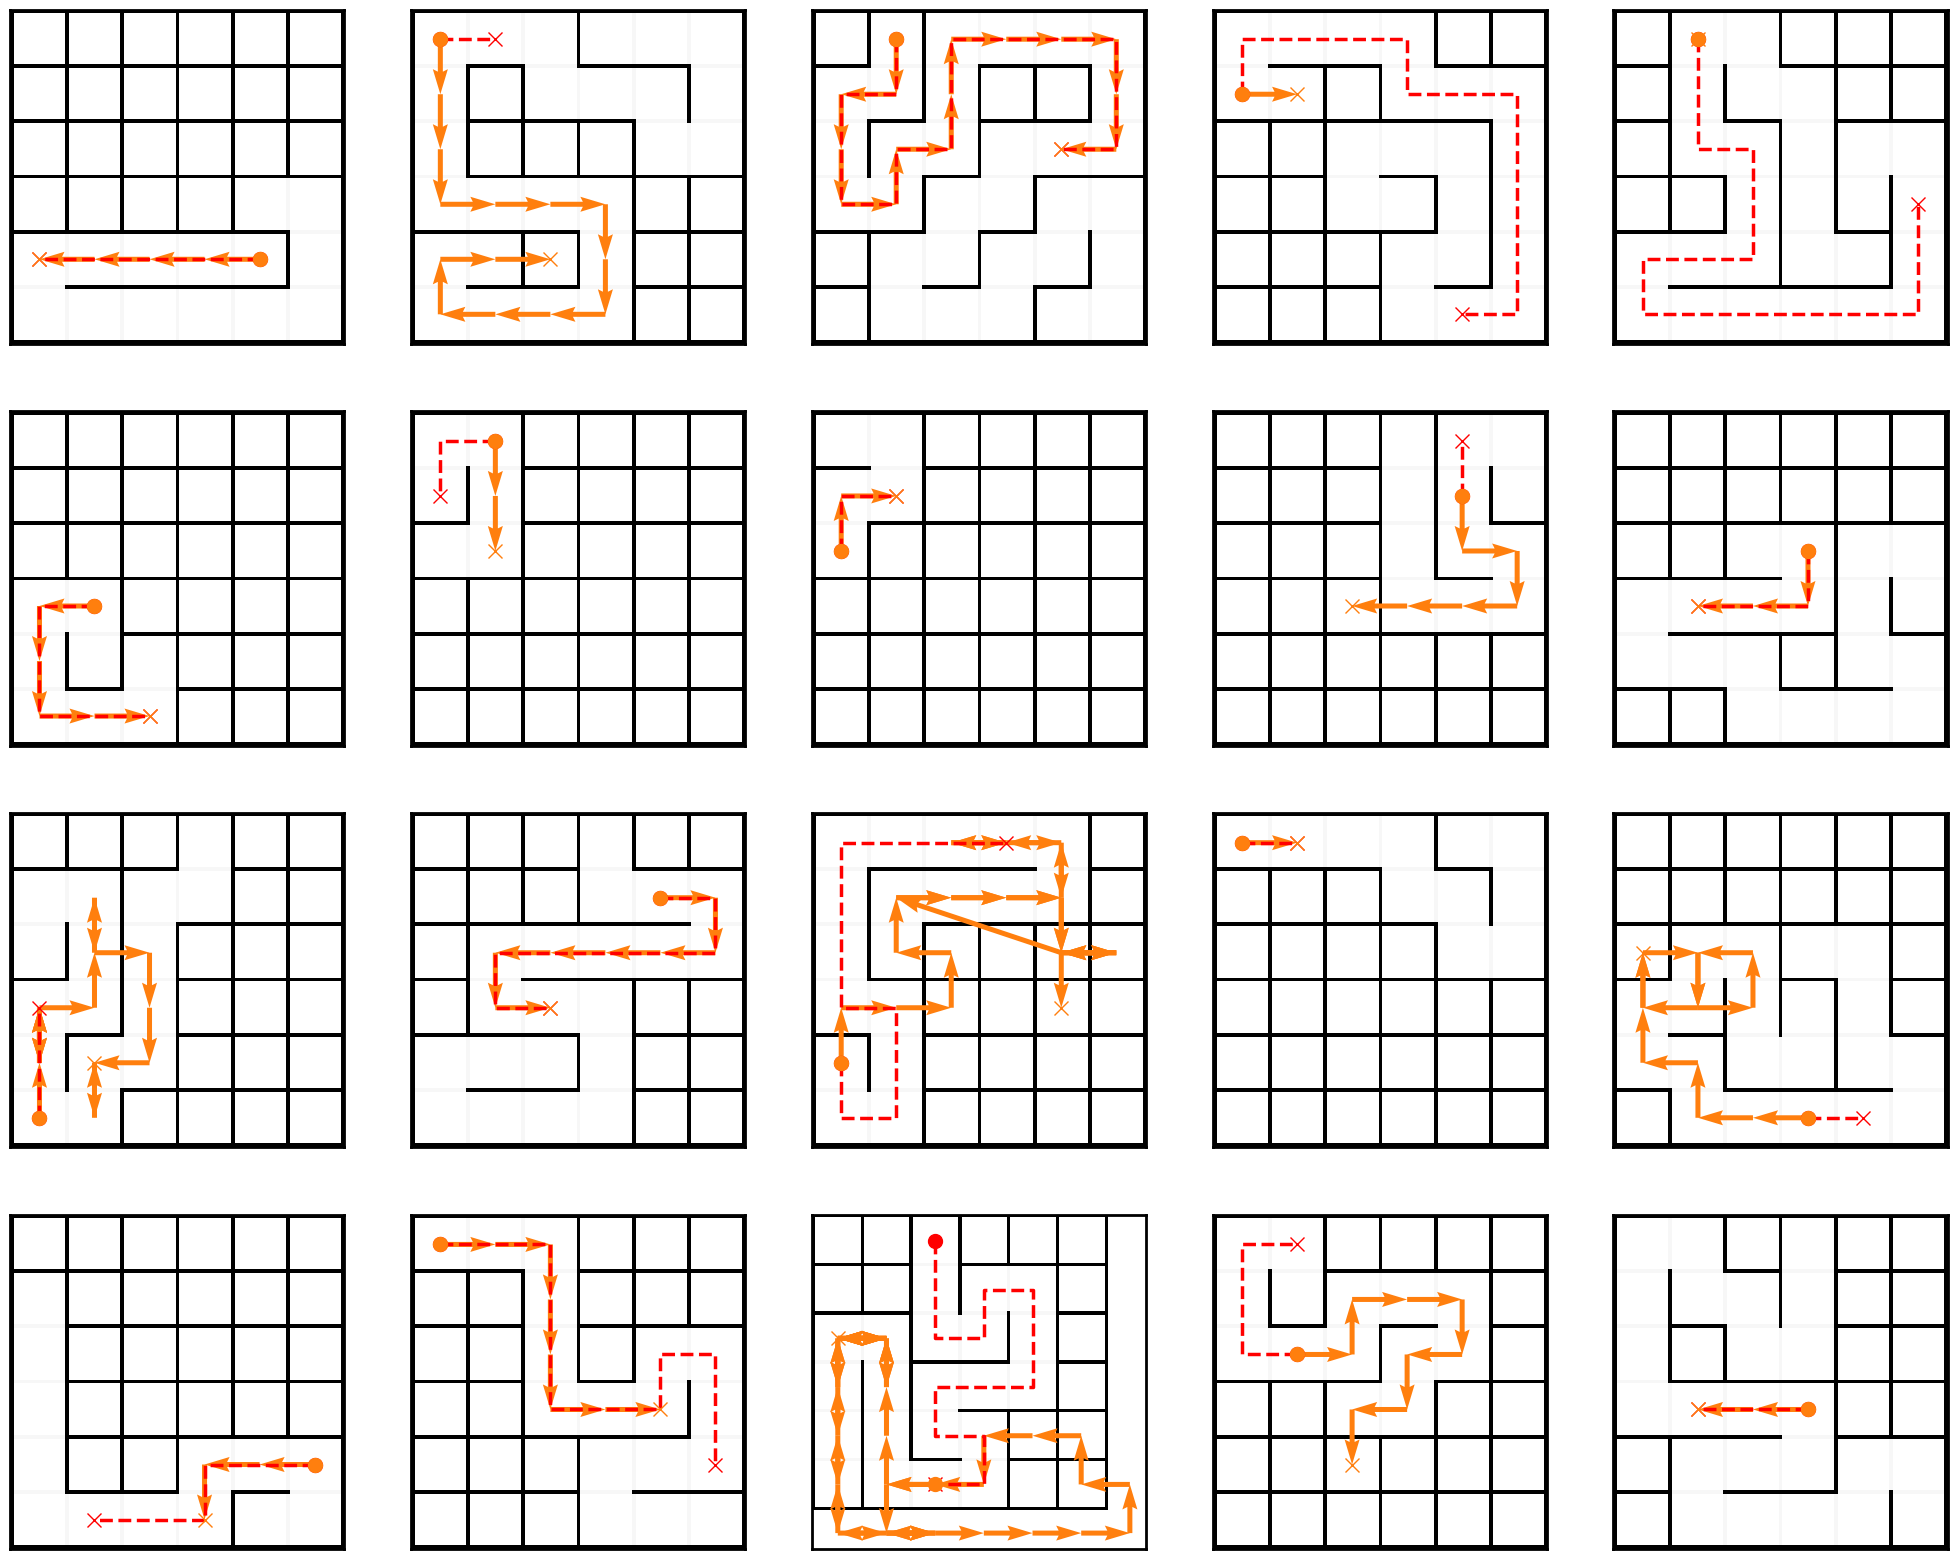

(<Figure size 2500x2000 with 20 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object))

In [5]:
plot_predicted_paths(MODEL, DATASET, n_mazes=20, max_new_tokens=50, row_length=5, figsize_scale=5)